In [1]:
import os.path as osp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# settings

titles = {
    "up": "Upregulated",
    "down": "Downregulated",
}

xtick_fontsize = 18
ytick_fontsize = 18
ylabel_fontsize = 18
title_fontsize = 18

output_dir = "."

0
0


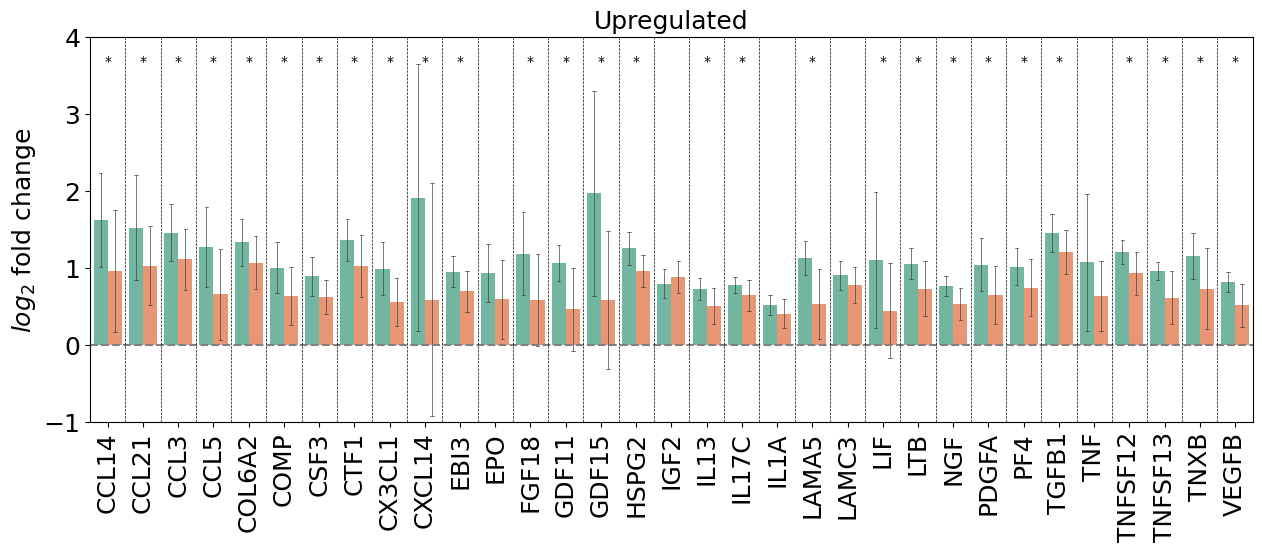

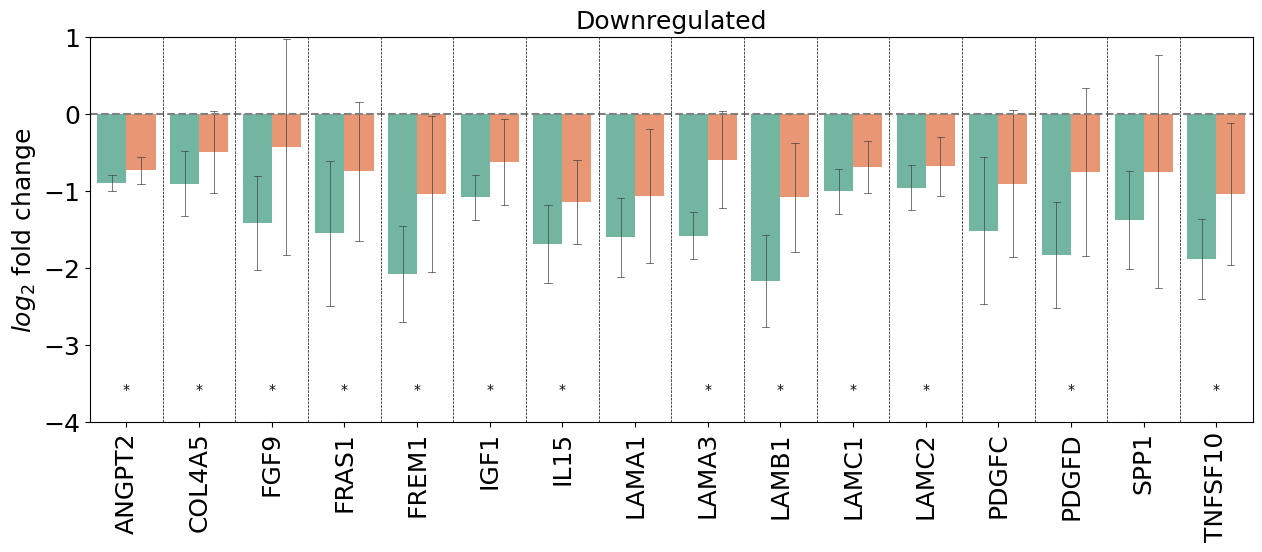

In [3]:
for direction in ["up", "down"]:
    # Load data
    mild_endo = pd.read_csv(f"l2fc_mild_{direction}.tsv", sep='\t', index_col='symbol')
    severe_endo = pd.read_csv(f"l2fc_severe_{direction}.tsv", sep='\t', index_col='symbol')

    mild_endo_long = mild_endo.stack().reset_index().rename(columns={'level_1': 'sample', 0: 'l2fc'})
    mild_endo_long['Condition'] = 'Endometriosis I/II'

    severe_endo_long = severe_endo.stack().reset_index().rename(columns={'level_1': 'sample', 0: 'l2fc'})
    severe_endo_long['Condition'] = 'Endometriosis III/IV'

    data = pd.concat([mild_endo_long, severe_endo_long])

    print(data['l2fc'].isnull().sum())

    # get ttest data
    ttest_data = pd.read_csv('ttest.tsv', sep='\t')
    is_sig_dict = dict(zip(ttest_data['symbol'], ttest_data['is_sig']))

    # Plot
    plt.figure(figsize=(15, 5))
    sns.barplot(x='symbol', y='l2fc', hue='Condition', data=data, errorbar='sd', palette='Set2', capsize=0.1, errwidth=0.5)
    plt.axhline(0, color='gray', linestyle='--') # reference line at y = 0

    if direction == "up":
        plt.ylim(-1, 4)
        plt.yticks(np.arange(-1, 5, 1), fontsize=ytick_fontsize)
    else:  # valley
        plt.ylim(-4, 1)
        plt.yticks(np.arange(-4, 2, 1), fontsize=ytick_fontsize)

    plt.xticks(rotation=90)
    plt.xticks(fontsize=xtick_fontsize)
    plt.xlabel('')
    plt.ylabel('$log_2$ fold change', fontsize=ylabel_fontsize) # y-axis name
    plt.title(titles[direction], fontsize=title_fontsize) # title

    # Get unique gene symbols
    unique_symbols = data['symbol'].unique()

    mid_positions = np.arange(0.5, len(unique_symbols))

    # Draw vertical lines as dividers
    for pos in mid_positions:
        plt.axvline(x=pos, color='black', linestyle='--', lw=0.5)

    # Annotate with asterisks for significant genes
    for i, symbol in enumerate(unique_symbols):
        if is_sig_dict.get(symbol, False):
            if direction == 'up':
                y_offset = -.02   # positioning
                plt.text(i, data['l2fc'].max() + y_offset, '*', ha='center')
            else:
                y_offset = -4.6
                plt.text(i, data['l2fc'].max() + y_offset, '*', ha='center')

    plt.legend().remove()

    # Save figure
    plt.savefig(osp.join(output_dir, f'{direction}regulated.png'), dpi=450, bbox_inches='tight')